In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("Insurance .csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to 'sex', 'smoker', and 'region' columns
df['sex_encoded'] = le.fit_transform(df['sex'])
df['smoker_encoded'] = le.fit_transform(df['smoker'])
df['region_encoded'] = le.fit_transform(df['region'])

# Display the updated DataFrame with new encoded columns
display(df.head())

,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [ ]:
df = df.drop(['sex', 'smoker', 'region'], axis=1)
display(df.head())

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_encoded
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Reload the original dataframe to include 'age' and 'bmi'
df_original = pd.read_csv("Insurance .csv")

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform 'age' and 'bmi' from the original dataframe
scaled_features = scaler.fit_transform(df_original[['age', 'bmi']])

# Add the scaled features to the current dataframe (df)
df['age_scaled'] = scaled_features[:, 0]
df['bmi_scaled'] = scaled_features[:, 1]


# Display the updated DataFrame with scaled columns
display(df.head())

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_encoded,age_scaled,bmi_scaled
0,19,27.900,0,16884.92400,0,1,3,-1.438764,-0.453320
1,18,33.770,1,1725.55230,1,0,2,-1.509965,0.509621
2,28,33.000,3,4449.46200,1,0,2,-0.797954,0.383307
3,33,22.705,0,21984.47061,1,0,1,-0.441948,-1.305531
4,32,28.880,0,3866.85520,1,0,1,-0.513149,-0.292556


In [ ]:
df = df.drop(['age', 'bmi'], axis=1, errors='ignore')
display(df.head())

,children,charges,sex_encoded,smoker_encoded,region_encoded,age_scaled,bmi_scaled
0,0,16884.92400,0,1,3,-1.438764,-0.453320
1,1,1725.55230,1,0,2,-1.509965,0.509621
2,3,4449.46200,1,0,2,-0.797954,0.383307
3,0,21984.47061,1,0,1,-0.441948,-1.305531
4,0,3866.85520,1,0,1,-0.513149,-0.292556


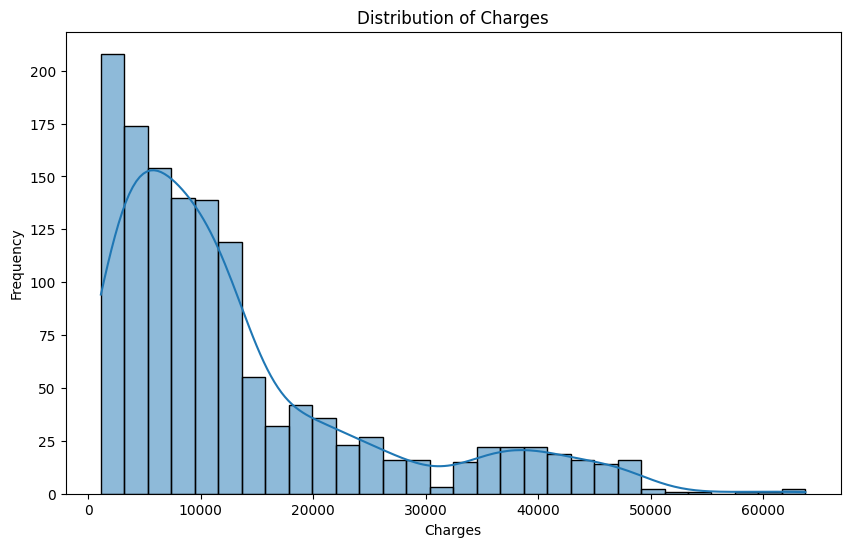

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, bins=30)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

The distribution of medical charges is right-skewed, indicating that most individuals have lower charges, while a smaller number have significantly higher charges.

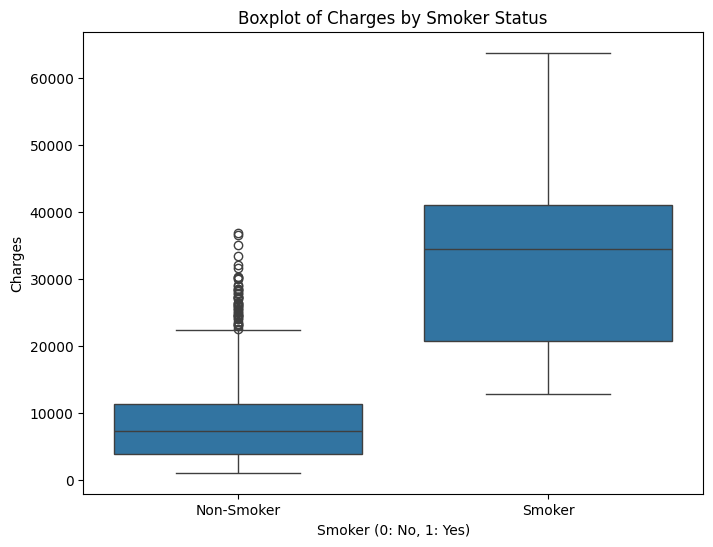

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker_encoded', y='charges', data=df)
plt.title('Boxplot of Charges by Smoker Status')
plt.xlabel('Smoker (0: No, 1: Yes)')
plt.ylabel('Charges')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.show()

Smokers tend to have substantially higher medical insurance charges compared to non-smokers.

<Figure size 1200x800 with 0 Axes>

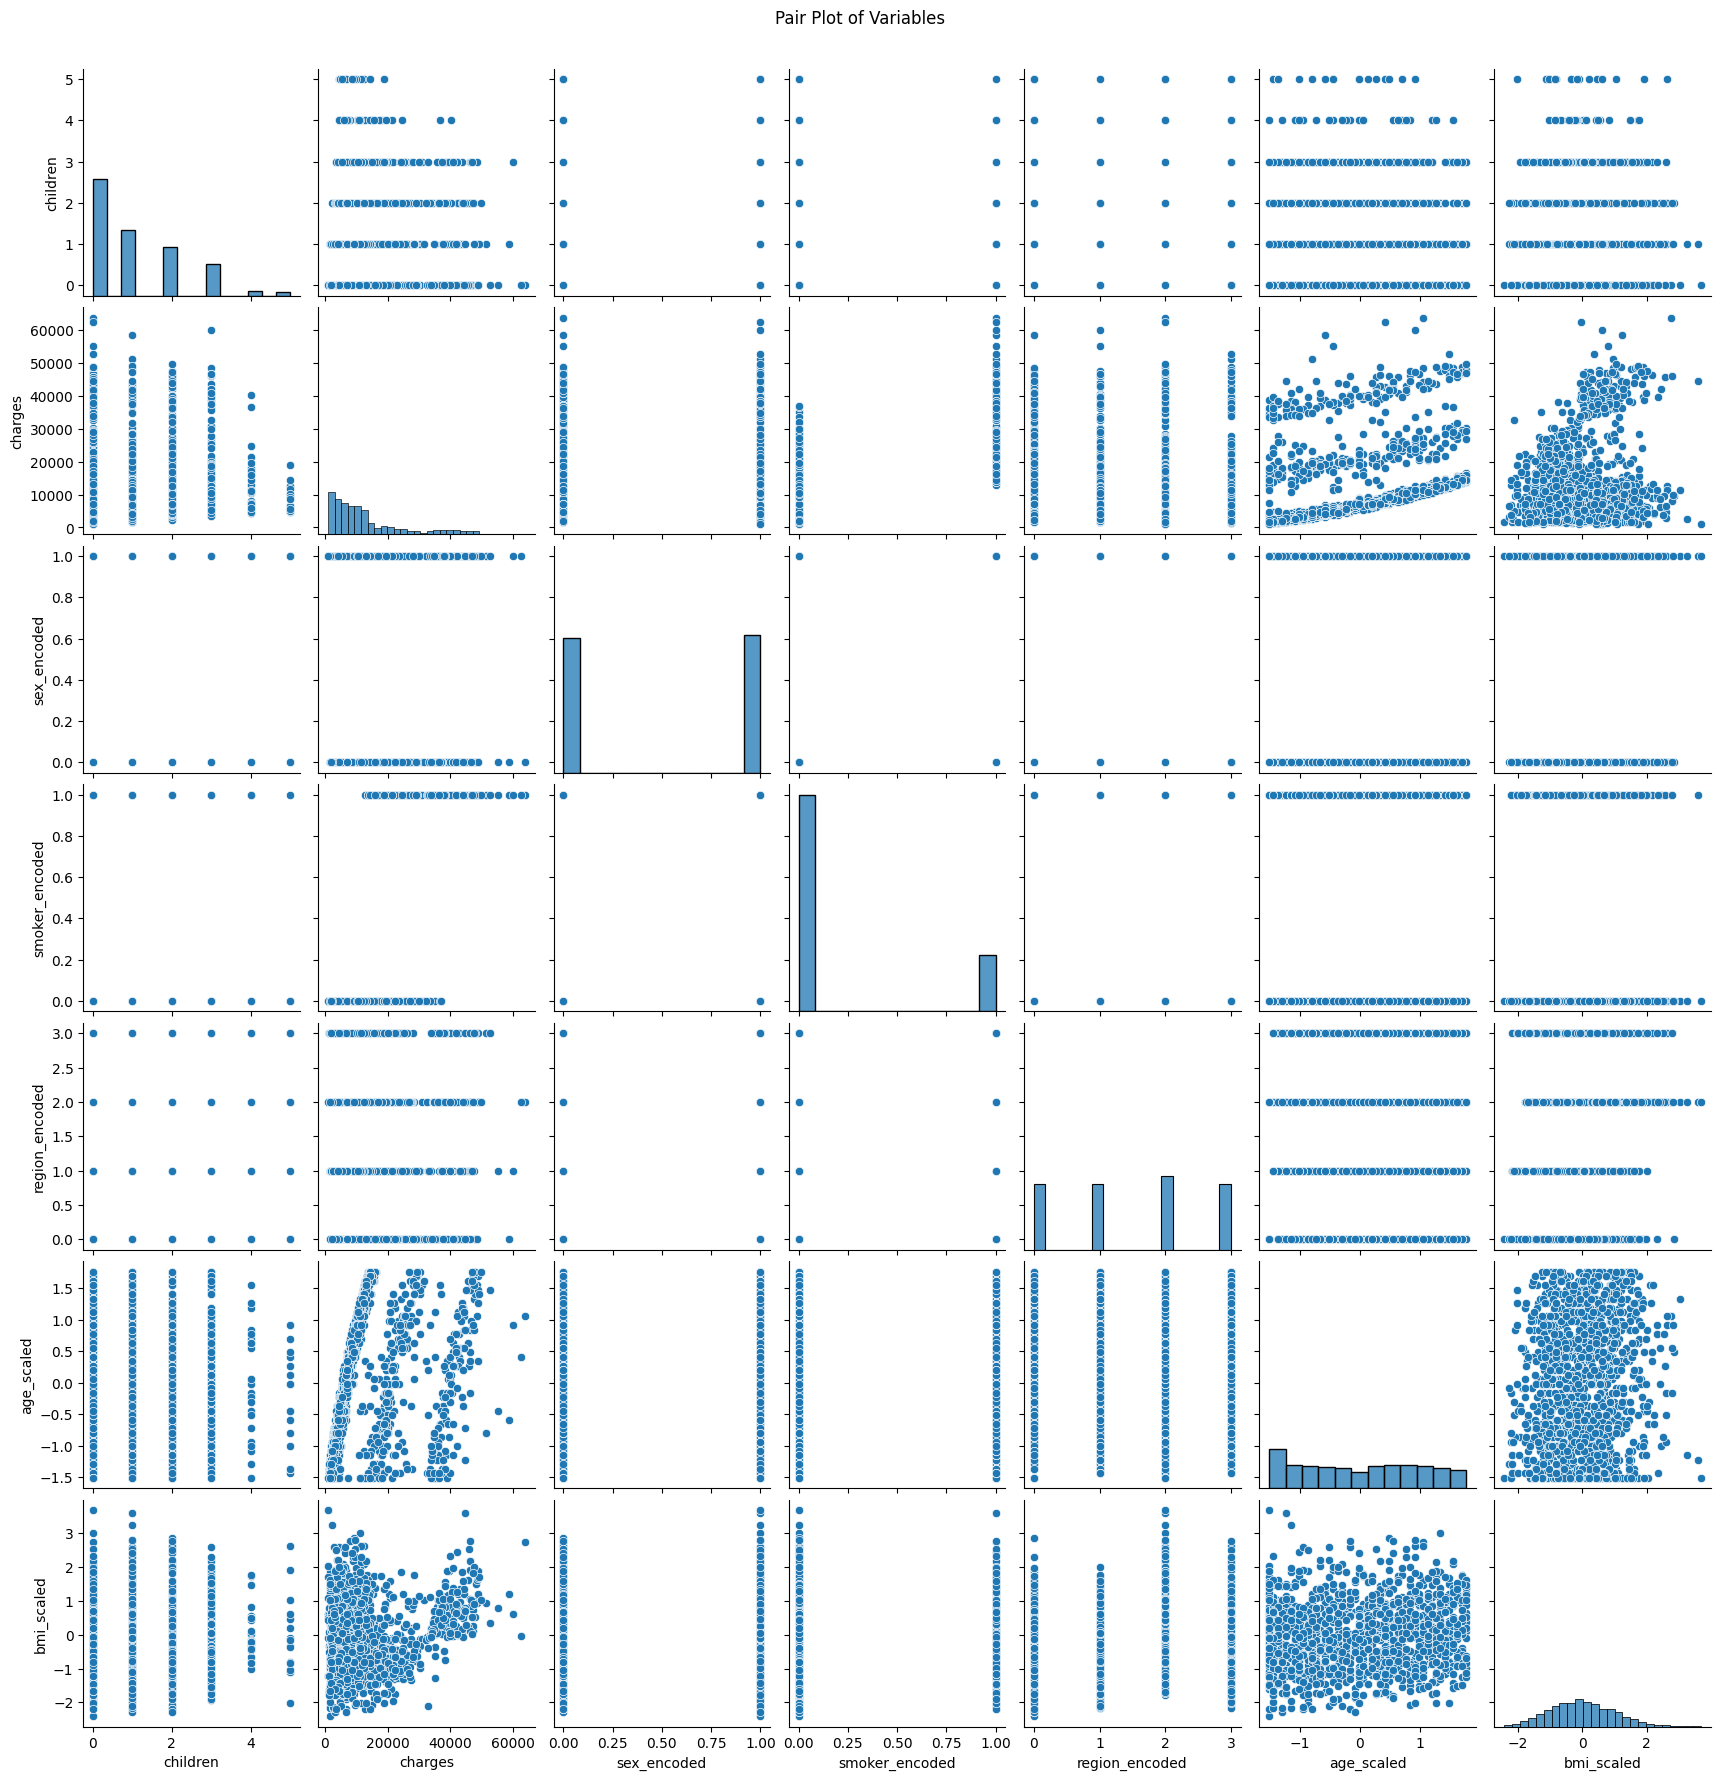

In [ ]:
plt.figure(figsize=(12, 8))
sns.pairplot(df)
plt.suptitle('Pair Plot of Variables', y=1.02)
plt.show()

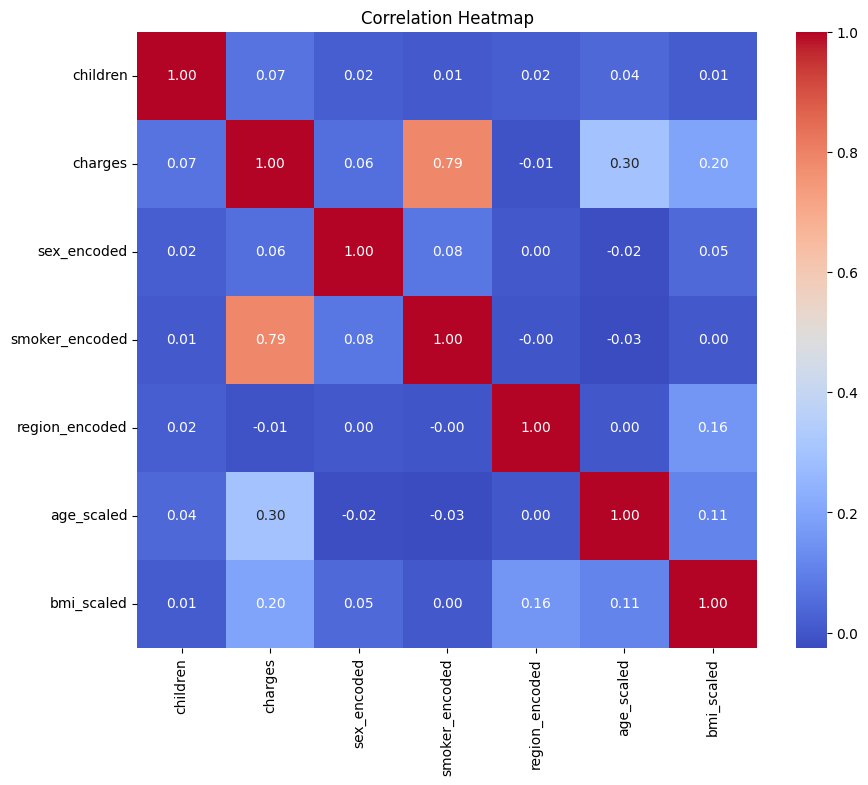

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The pair plot and correlation heatmap reveal some relationships between variables:
'smoker_encoded' has the strongest positive correlation with 'charges' (0.79).
'age_scaled' (0.30) and 'bmi_scaled' (0.20) also show positive correlations with 'charges', although weaker than smoker status.
Other variables ('children', 'sex_encoded', 'region_encoded') have very weak correlations with 'charges'.

In [ ]:
df.head()

,children,charges,sex_encoded,smoker_encoded,region_encoded,age_scaled,bmi_scaled
0,0,16884.92400,0,1,3,-1.438764,-0.453320
1,1,1725.55230,1,0,2,-1.509965,0.509621
2,3,4449.46200,1,0,2,-0.797954,0.383307
3,0,21984.47061,1,0,1,-0.441948,-1.305531
4,0,3866.85520,1,0,1,-0.513149,-0.292556


In [ ]:
from sklearn.model_selection import train_test_split

X = df[['age_scaled','sex_encoded','bmi_scaled','children','smoker_encoded','region_encoded']]
y = df['charges']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [ ]:
X_test.head()

,age_scaled,sex_encoded,bmi_scaled,children,smoker_encoded,region_encoded
698,1.195680,1,0.502239,0,0,1
520,0.768473,0,-0.541904,0,0,0
1144,0.768473,1,0.268476,2,0,3
908,1.694088,1,1.498809,3,0,3
559,-1.438764,1,0.798339,0,0,1


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Coefficients:", model.coef_)

Coefficients: [ 3484.76002347  -157.73246064  2070.28309964   567.74309618
 23718.23012088  -333.28037355]


In [ ]:
print("Intercept:", model.intercept_)

Intercept: 8481.514489555855


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([13196.9358584 , 10037.56247782, 11693.19055205, 18033.62030664,
        4629.54200824,  2174.69963192,  2136.2366869 , 11908.14958186,
       38373.2187102 , 11295.7700803 , 16288.50190433, 28940.03202557,
        3271.37952943, 13160.35499614, 29788.41354011,  9683.23390953,
       32100.45515279, 12275.42602464,  3049.2971247 , 11122.71605301,
       38984.50466828,  8217.07650235, 11624.70707714,  2327.18516136,
       12608.54279746,  6201.97203832, 32879.84118544, 12820.13932902,
       28692.54666772, 12041.95048203, 10134.86178528,  2817.61385266,
       38391.19421273, 38619.4789662 , 14788.22862233,  7039.47872064,
        3911.24515594,   970.04163198, 31876.89956959, 25990.42824859,
       12263.57757925, 16355.92894147,  1857.14947141,  1174.59046284,
       13376.53433911,  8540.34546148, 10737.2937991 ,  5895.7301352 ,
       38156.41306051,  2378.42036946, 12187.59641569, 35658.13064222,
       10076.80369243, 11506.93865618,  7334.50136612, 27350.34741037,
      

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 4035.6014996775307
Mean Squared Error (MSE): 30665429.779517215


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score on the test data: {r2}")

R-squared score on the test data: 0.7960709949046044


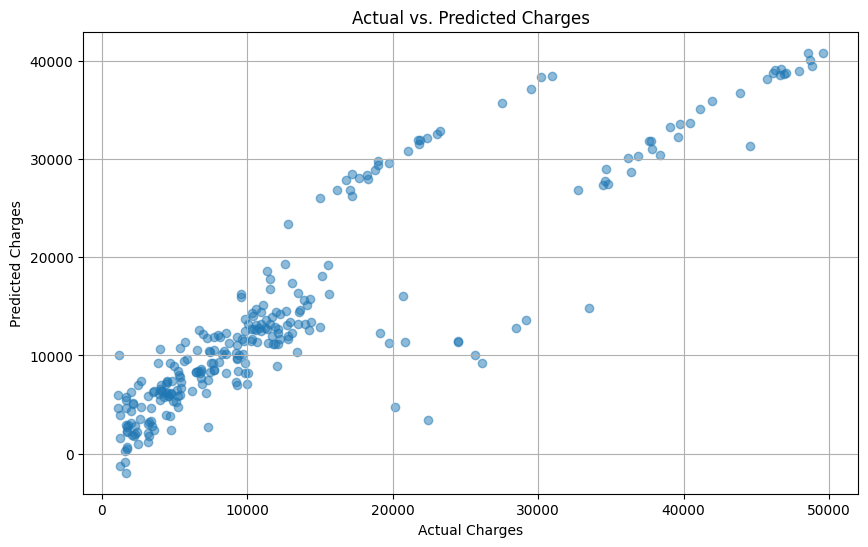

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')
plt.grid(True)
plt.show()

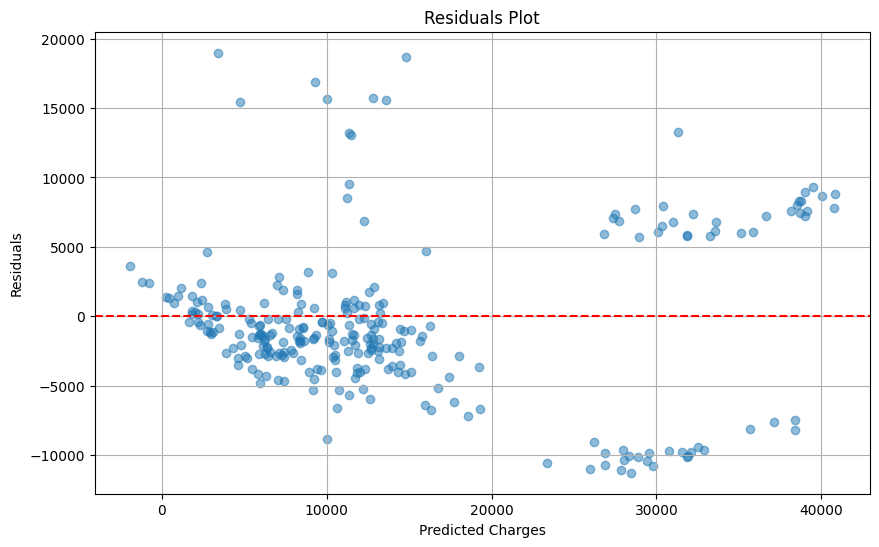

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

## Analysis Summary

Based on the analysis performed, here's a summary of the key findings:

**Data Overview and Preparation:**

*   The dataset contains 1338 entries and 7 columns, including age, sex, BMI, number of children, smoker status, region, and medical charges.
*   There are no missing values in the dataset.
*   Categorical features ('sex', 'smoker', 'region') were encoded into numerical representations ('sex\_encoded', 'smoker\_encoded', 'region\_encoded').
*   Numerical features ('age', 'bmi') were scaled using StandardScaler ('age\_scaled', 'bmi\_scaled').
*   The original categorical and unscaled numerical columns were dropped from the DataFrame.

**Exploratory Data Analysis:**

*   The distribution of medical charges is right-skewed, indicating that most individuals have lower charges, while a smaller number have significantly higher charges.
*   Smokers tend to have substantially higher medical insurance charges compared to non-smokers, as clearly shown in the boxplot.
*   The pair plot and correlation heatmap reveal some relationships between variables:
    *   'smoker\_encoded' has the strongest positive correlation with 'charges' (0.79).
    *   'age\_scaled' (0.30) and 'bmi\_scaled' (0.20) also show positive correlations with 'charges', although weaker than smoker status.
    *   Other variables ('children', 'sex\_encoded', 'region\_encoded') have very weak correlations with 'charges'.

**Model Training and Evaluation (Linear Regression):**

*   A Linear Regression model was trained to predict medical charges based on the prepared features.
*   The model's coefficients indicate the impact of each feature on the predicted charges. Notably, 'smoker\_encoded' has a large positive coefficient (approximately 23718), confirming the strong positive relationship observed in the EDA.
*   The model achieved an R-squared score of approximately 0.796 on the test data, meaning it explains about 80% of the variance in medical charges.
*   The Mean Absolute Error (MAE) is around 4035.60, and the Mean Squared Error (MSE) is about 30.67 million. This indicates that, on average, the model's predictions are off by about $4035.60.
*   The scatter plot of actual vs. predicted charges shows a general positive correlation, but the predictions become less accurate for higher charge values.
*   The residuals plot shows a pattern where the residuals (errors) tend to increase as the predicted charges increase, suggesting that the model has more difficulty accurately predicting very high medical costs.

In summary, the analysis highlights the significant impact of smoking status on medical charges. While the linear regression model performs reasonably well (explaining about 80% of the variance), it struggles to accurately predict higher medical costs, as indicated by the increasing residuals at higher predicted values. Further analysis or a different model might be needed to improve predictions for high-cost cases.